#### Import Packages

In [574]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()
import fancyimpute

#### Load Dataset

In [575]:
data = pd.read_csv('LoanStats3a.csv',skiprows = 1,low_memory=False)

In [576]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### 2) Find the average annual income and number of loan applicants by state

In [577]:
data.application_type.value_counts() # Check the application type to decide whether I should consider co-aplicatant

Individual    42535
Name: application_type, dtype: int64

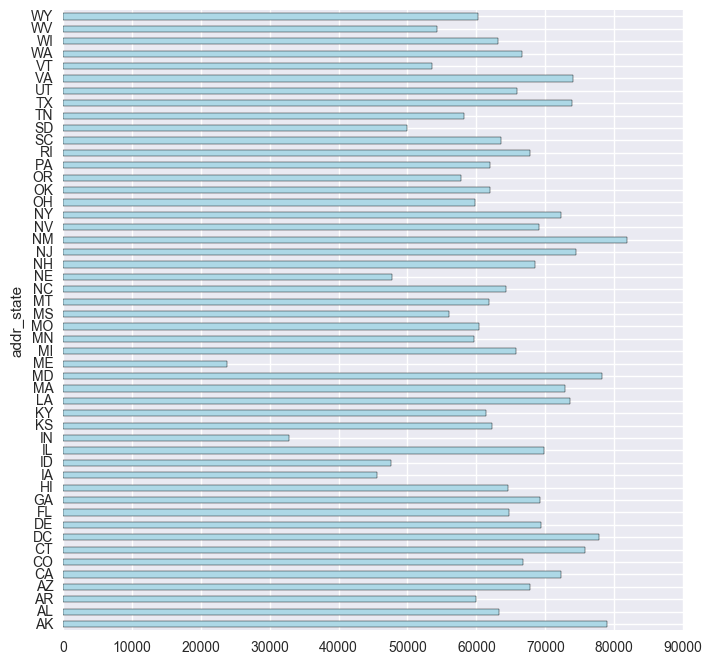

In [578]:
data.groupby(['addr_state']).annual_inc.mean().plot(kind = 'barh',figsize = (8,8),color = 'lightblue')

In [579]:
average_income = data.groupby(['addr_state']).annual_inc.mean().round(2).reset_index(name='Average Income')
average_income

,addr_state,Average Income
0,AK,78902.43
1,AL,63275.84
2,AR,59946.40
3,AZ,67799.88
4,CA,72221.44
5,CO,66823.79
6,CT,75707.02
7,DC,77794.44
8,DE,69437.43
9,FL,64789.77


In [580]:
count_by_state = data.groupby(['addr_state']).size().reset_index(name='counts')
count_by_state

,addr_state,counts
0,AK,86
1,AL,484
2,AR,261
3,AZ,933
4,CA,7429
5,CO,857
6,CT,816
7,DC,224
8,DE,136
9,FL,3104


In [581]:
# import matplotlib.pyplot as plt
# import pandas as pd
# from pandas.tools.plotting import table

# ax = plt.subplot(111, frame_on=False) # no visible frame
# ax.xaxis.set_visible(False)  # hide the x axis
# ax.yaxis.set_visible(False)  # hide the y axis

# table(ax, count_by_state)  # where df is your data frame

In [582]:
# data.groupby(['addr_state']).size().reset_index(name='counts').plot(kind = 'barh')

### 3) Consider the annual income of applicants from West Virginia and New Mexico

#### a.	Plot a histogram comparing the annual income of applicants from these states.

(array([ 20.,  43.,  51.,  25.,  23.,  17.,   4.,   1.,   2.,   1.]),
 array([   7000.,   23300.,   39600.,   55900.,   72200.,   88500.,
         104800.,  121100.,  137400.,  153700.,  170000.]),
 <a list of 10 Patch objects>)

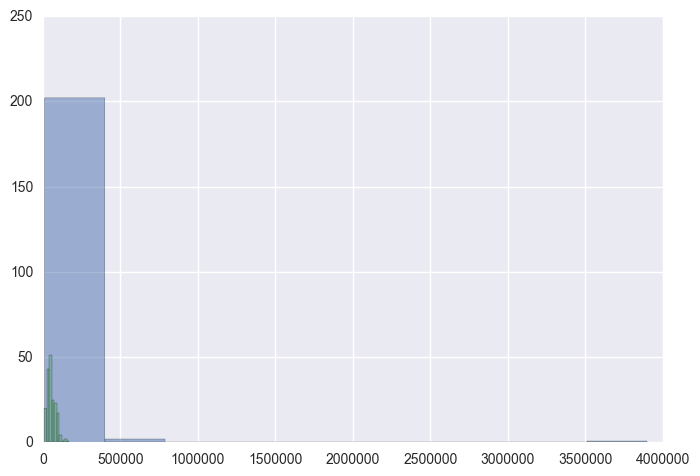

In [585]:
plt.hist(data.ix[data.addr_state=='NM','annual_inc'],alpha=0.5)
plt.hist(data.ix[data.addr_state=='WV','annual_inc'],alpha=0.5)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([   7000.,   23300.,   39600.,   55900.,   72200.,   88500.,
         104800.,  121100.,  137400.,  153700.,  170000.]),
 <a list of 10 Patch objects>)

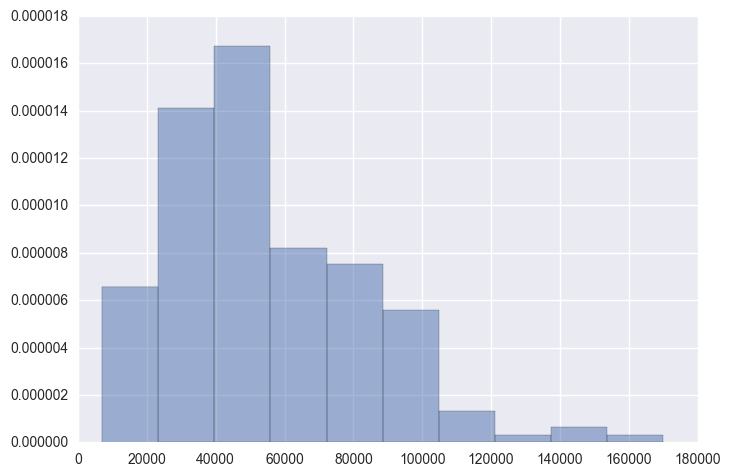

In [586]:
plt.hist(data.ix[data.addr_state=='WV','annual_inc'],normed=True,alpha=0.5)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([   10000.,   399000.,   788000.,  1177000.,  1566000.,  1955000.,
         2344000.,  2733000.,  3122000.,  3511000.,  3900000.]),
 <a list of 10 Patch objects>)

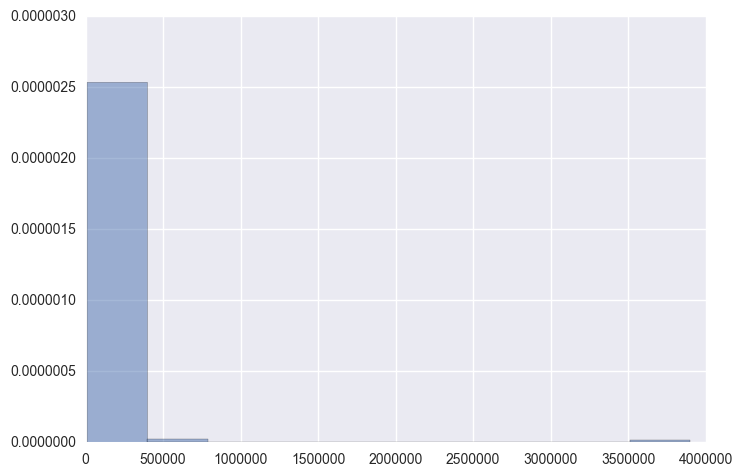

In [588]:
plt.hist(data.ix[data.addr_state=='NM','annual_inc'],normed=True,alpha=0.5)

#### b.	Form and test a hypothesis regarding the average annual incomes of the residents of West Virginia and New Mexico.

### Build the Model

In [421]:
# Drop rows without loan status column value
data = data.drop(data[data.loan_status.isnull()].index)

In [422]:
data.loan_status

0                                               Fully Paid
1                                              Charged Off
2                                               Fully Paid
3                                               Fully Paid
4                                               Fully Paid
5                                               Fully Paid
6                                               Fully Paid
7                                               Fully Paid
8                                              Charged Off
9                                              Charged Off
10                                              Fully Paid
11                                              Fully Paid
12                                             Charged Off
13                                              Fully Paid
14                                             Charged Off
15                                              Fully Paid
16                                              Fully Pa

In [423]:
# Change loan status into binary value
data['loan_status'] = ['non_defaulted' if x in ['Fully Paid','Does not meet the credit policy.  Status:Fully Paid'] 
                       else 'defaulted' for x in data['loan_status']]

In [424]:
# Make the feature matrix and label
y = data.loan_status
X = data

In [425]:
X.shape

(42535, 145)

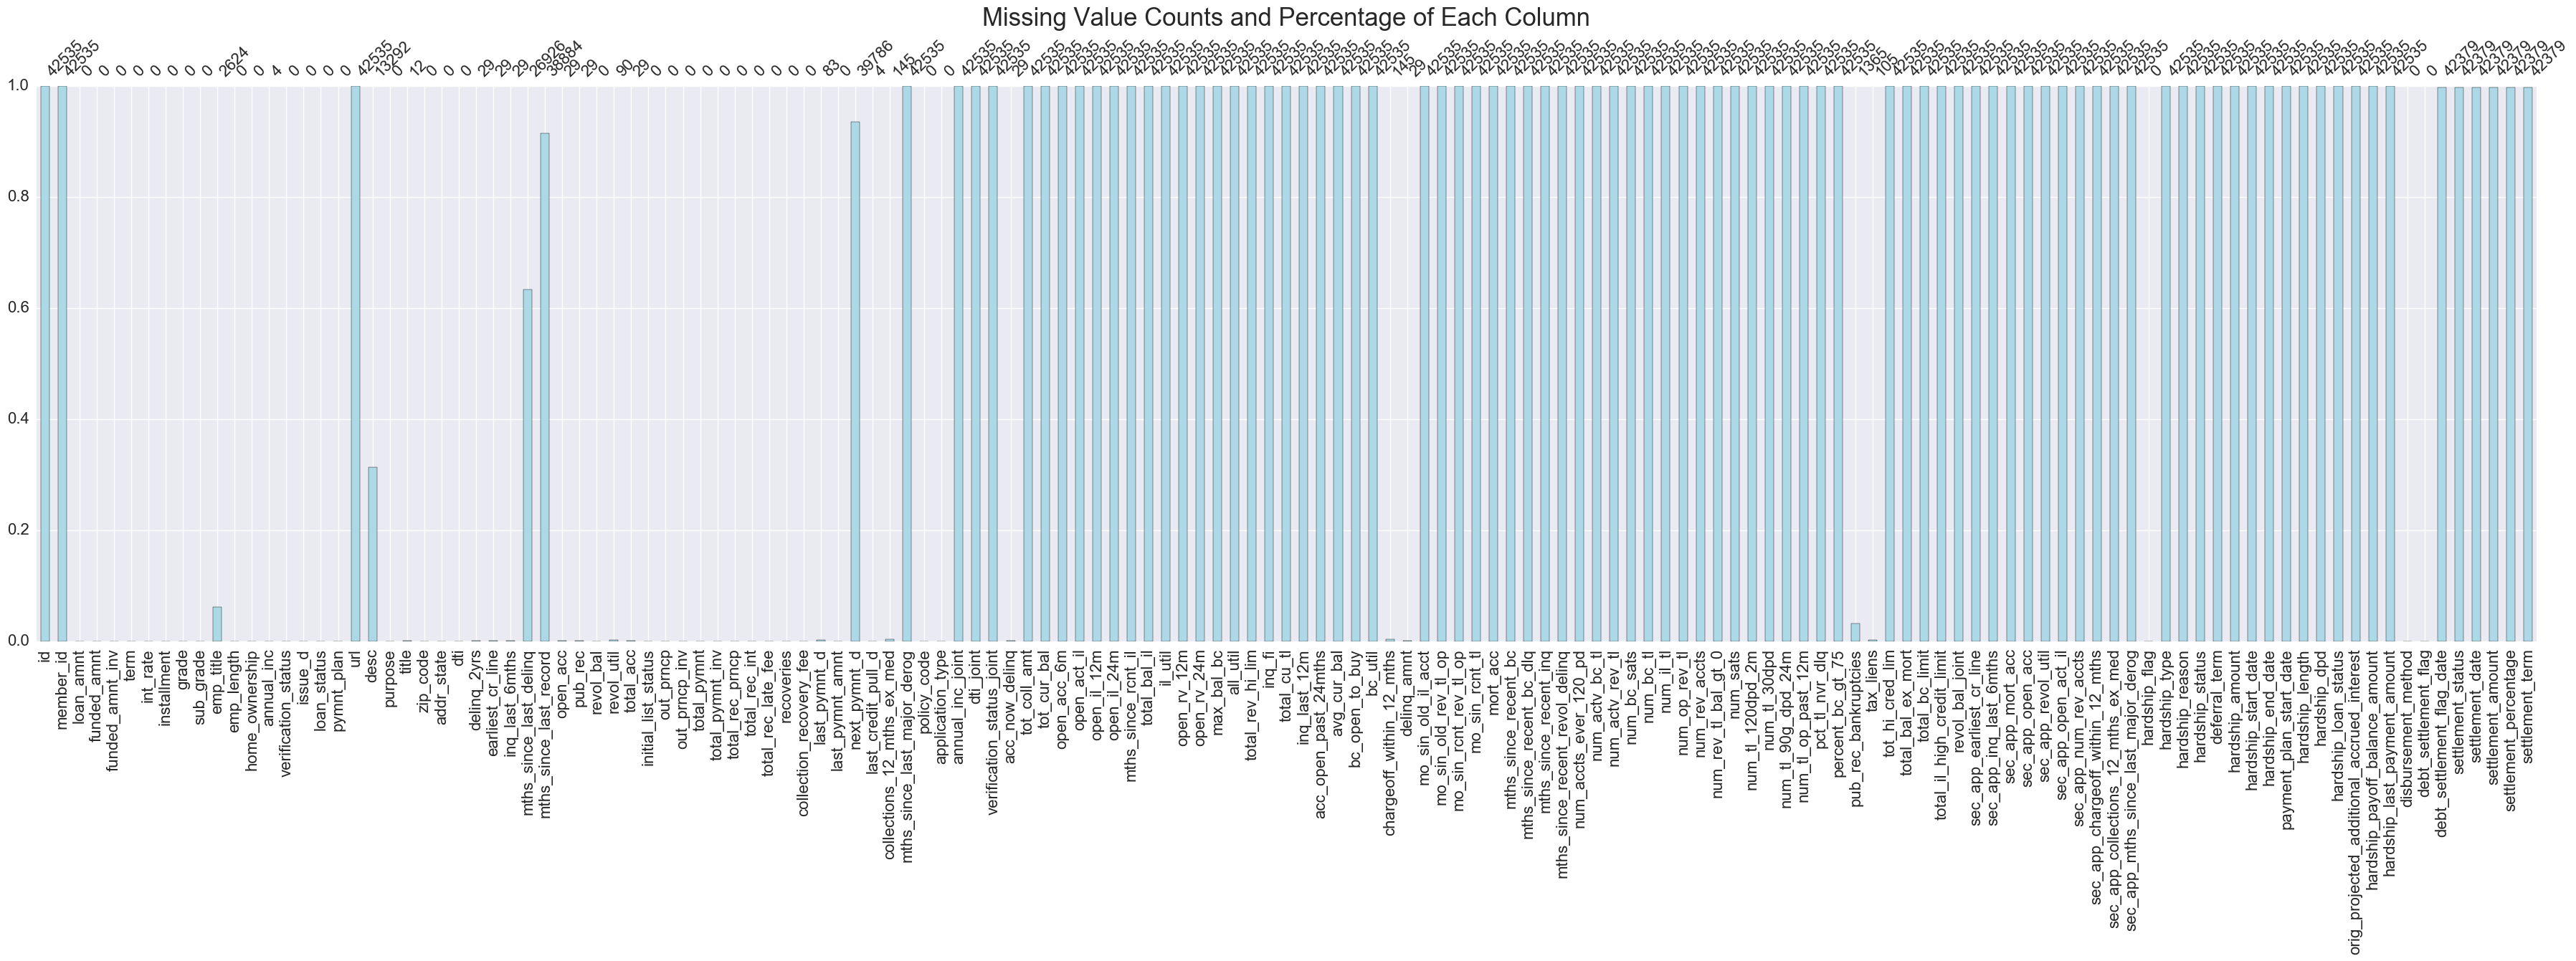

In [426]:
def missing_value_bar(df, figsize=(20, 10), fontsize=16, labels=None, log=False, color=(0.25, 0.25, 0.25), inline=True,
        filter=None, n=0, p=0, sort=None,title_string=None):
    """
    Plots a bar chart of data nullities by column.

    :param df: The DataFrame whose completeness is being nullity matrix mapped.
    :param log: Whether or not to display a logorithmic plot. Defaults to False (linear).
    :param filter: The filter to apply to the heatmap. Should be one of "top", "bottom", or None (default). See
    `nullity_filter()` for more information.
    :param n: The cap on the number of columns to include in the filtered DataFrame. See  `nullity_filter()` for
    more information.
    :param p: The cap on the percentage fill of the columns in the filtered DataFrame. See  `nullity_filter()` for
    more information.
    :param sort: The sort to apply to the heatmap. Should be one of "ascending", "descending", or None. See
    `nullity_sort()` for more information.
    :param figsize: The size of the figure to display. This is a `matplotlib` parameter. Defaults to (24,
    10).
    :param fontsize: The figure's font size. This default to 16.
    :param labels: Whether or not to display the column names. Would need to be turned off on particularly large
    displays. Defaults to True.
    :param color: The color of the filled columns. Default is a medium dark gray: the RGB multiple `(0.25, 0.25, 0.25)`.
    :return: If `inline` is True, the underlying `matplotlib.figure` object. Else, nothing.
    """
    # Get counts.
    nullity_counts = df.isnull().sum()

    # Create the basic plot.
    fig = plt.figure(figsize=figsize)
    (nullity_counts / len(df)).plot(kind='bar', figsize=figsize, fontsize=fontsize, color=color, log=log)
    plt.title(title_string, y=1.1,fontsize = 25)

    # Get current axis.
    ax1 = plt.gca()

    # Start appending elements, starting with a modified bottom x axis.
    if labels or (labels is None and len(df.columns) <= 50):
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=fontsize)

    # Create the third axis, which displays columnar totals above the rest of the plot.
    ax3 = ax1.twiny()
    ax3.set_xticks(ax1.get_xticks())
    ax3.set_xlim(ax1.get_xlim())
    ax3.set_xticklabels(nullity_counts.values, fontsize=fontsize, rotation=45, ha='left')
    ax3.grid(False)

    # Display.
    if inline:
        plt.show()
    else:
        return fig
missing_value_bar(X,figsize=(45, 10),color="lightblue",title_string = "Missing Value Counts and Percentage of Each Column")

In [427]:
# Drop column with 50% of missing value
check_null = X.isnull().sum(axis=0).sort_values(ascending=False)/float(len(X))
X.drop(check_null[check_null>0.5].index, axis=1, inplace=True) 

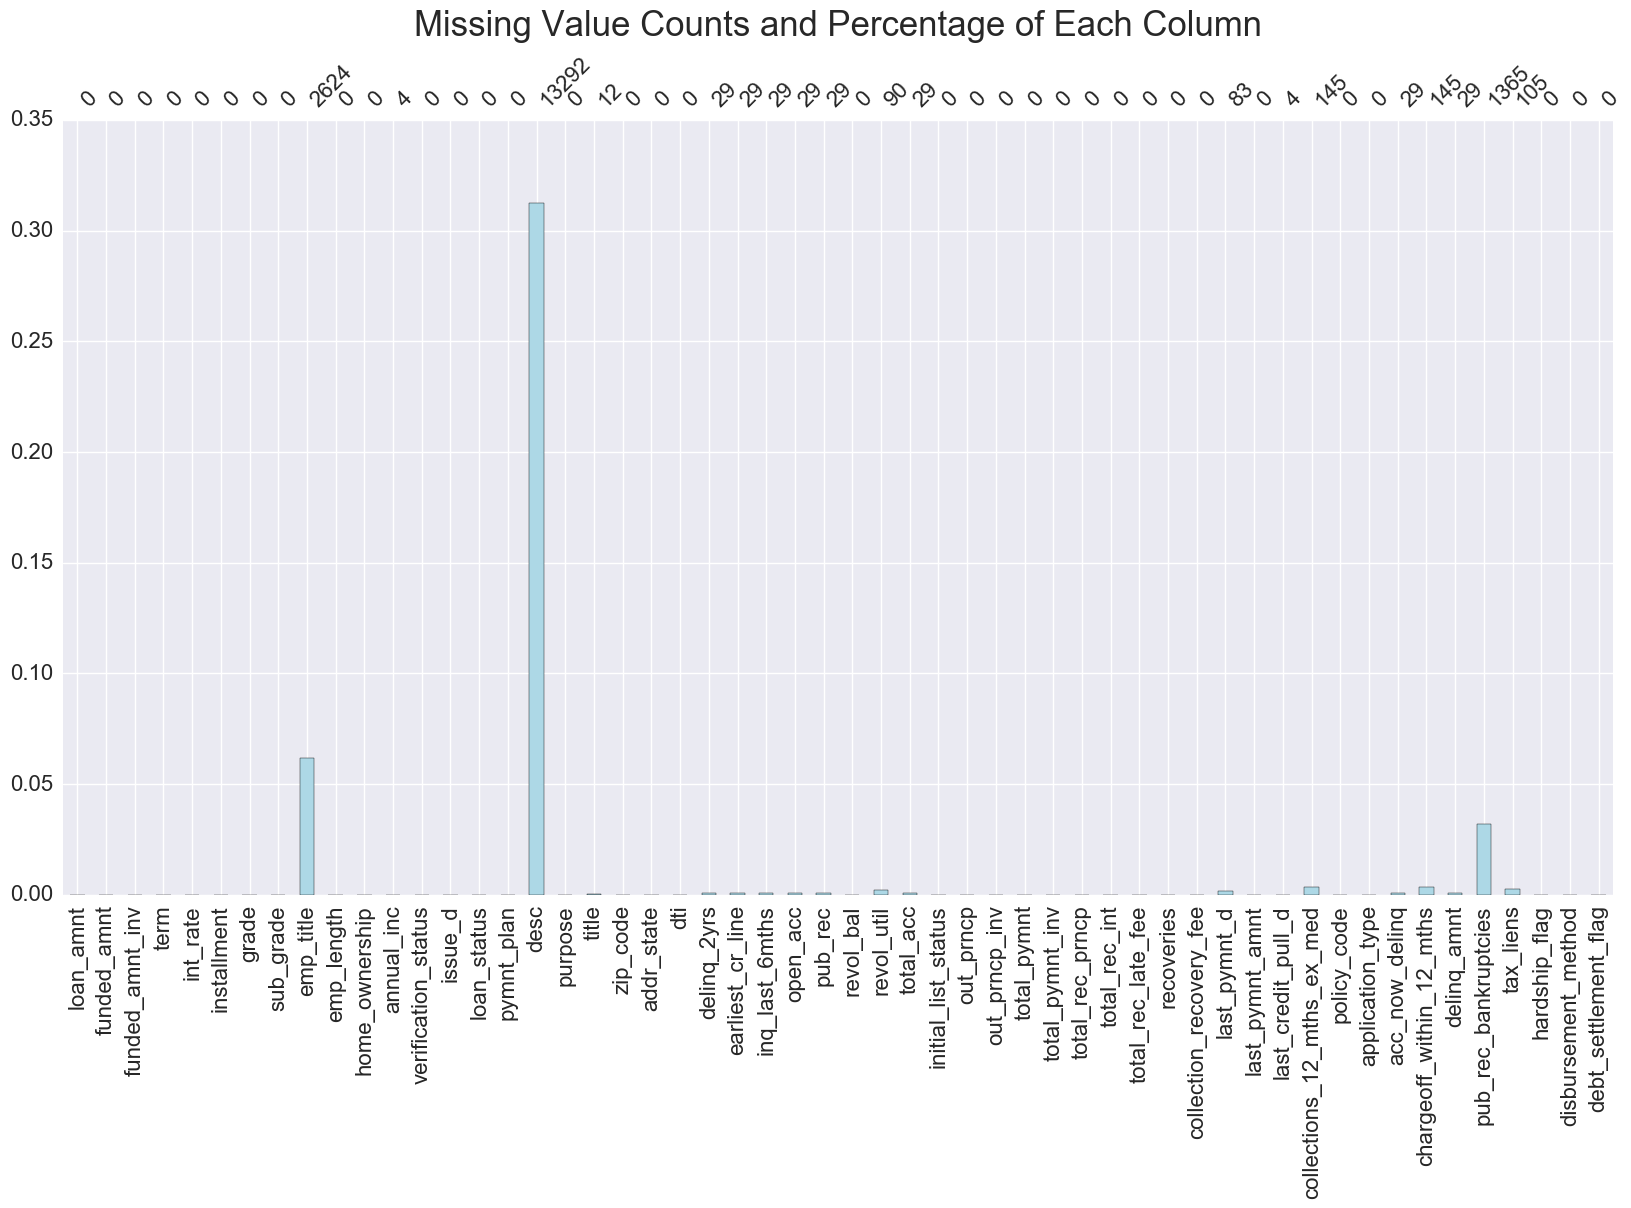

In [428]:
# Plot the columns with missing value again
missing_value_bar(X,color="lightblue",title_string = "Missing Value Counts and Percentage of Each Column")

In [429]:
X.shape

(42535, 54)

In [430]:
# Drop columns with identical value for all observations
counts = np.array([len(X[col].value_counts()) for col in X.columns])
X.drop(X[X.columns[counts == 1]].columns, axis=1, inplace=True) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1bdccd128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1bfe01668>]], dtype=object)

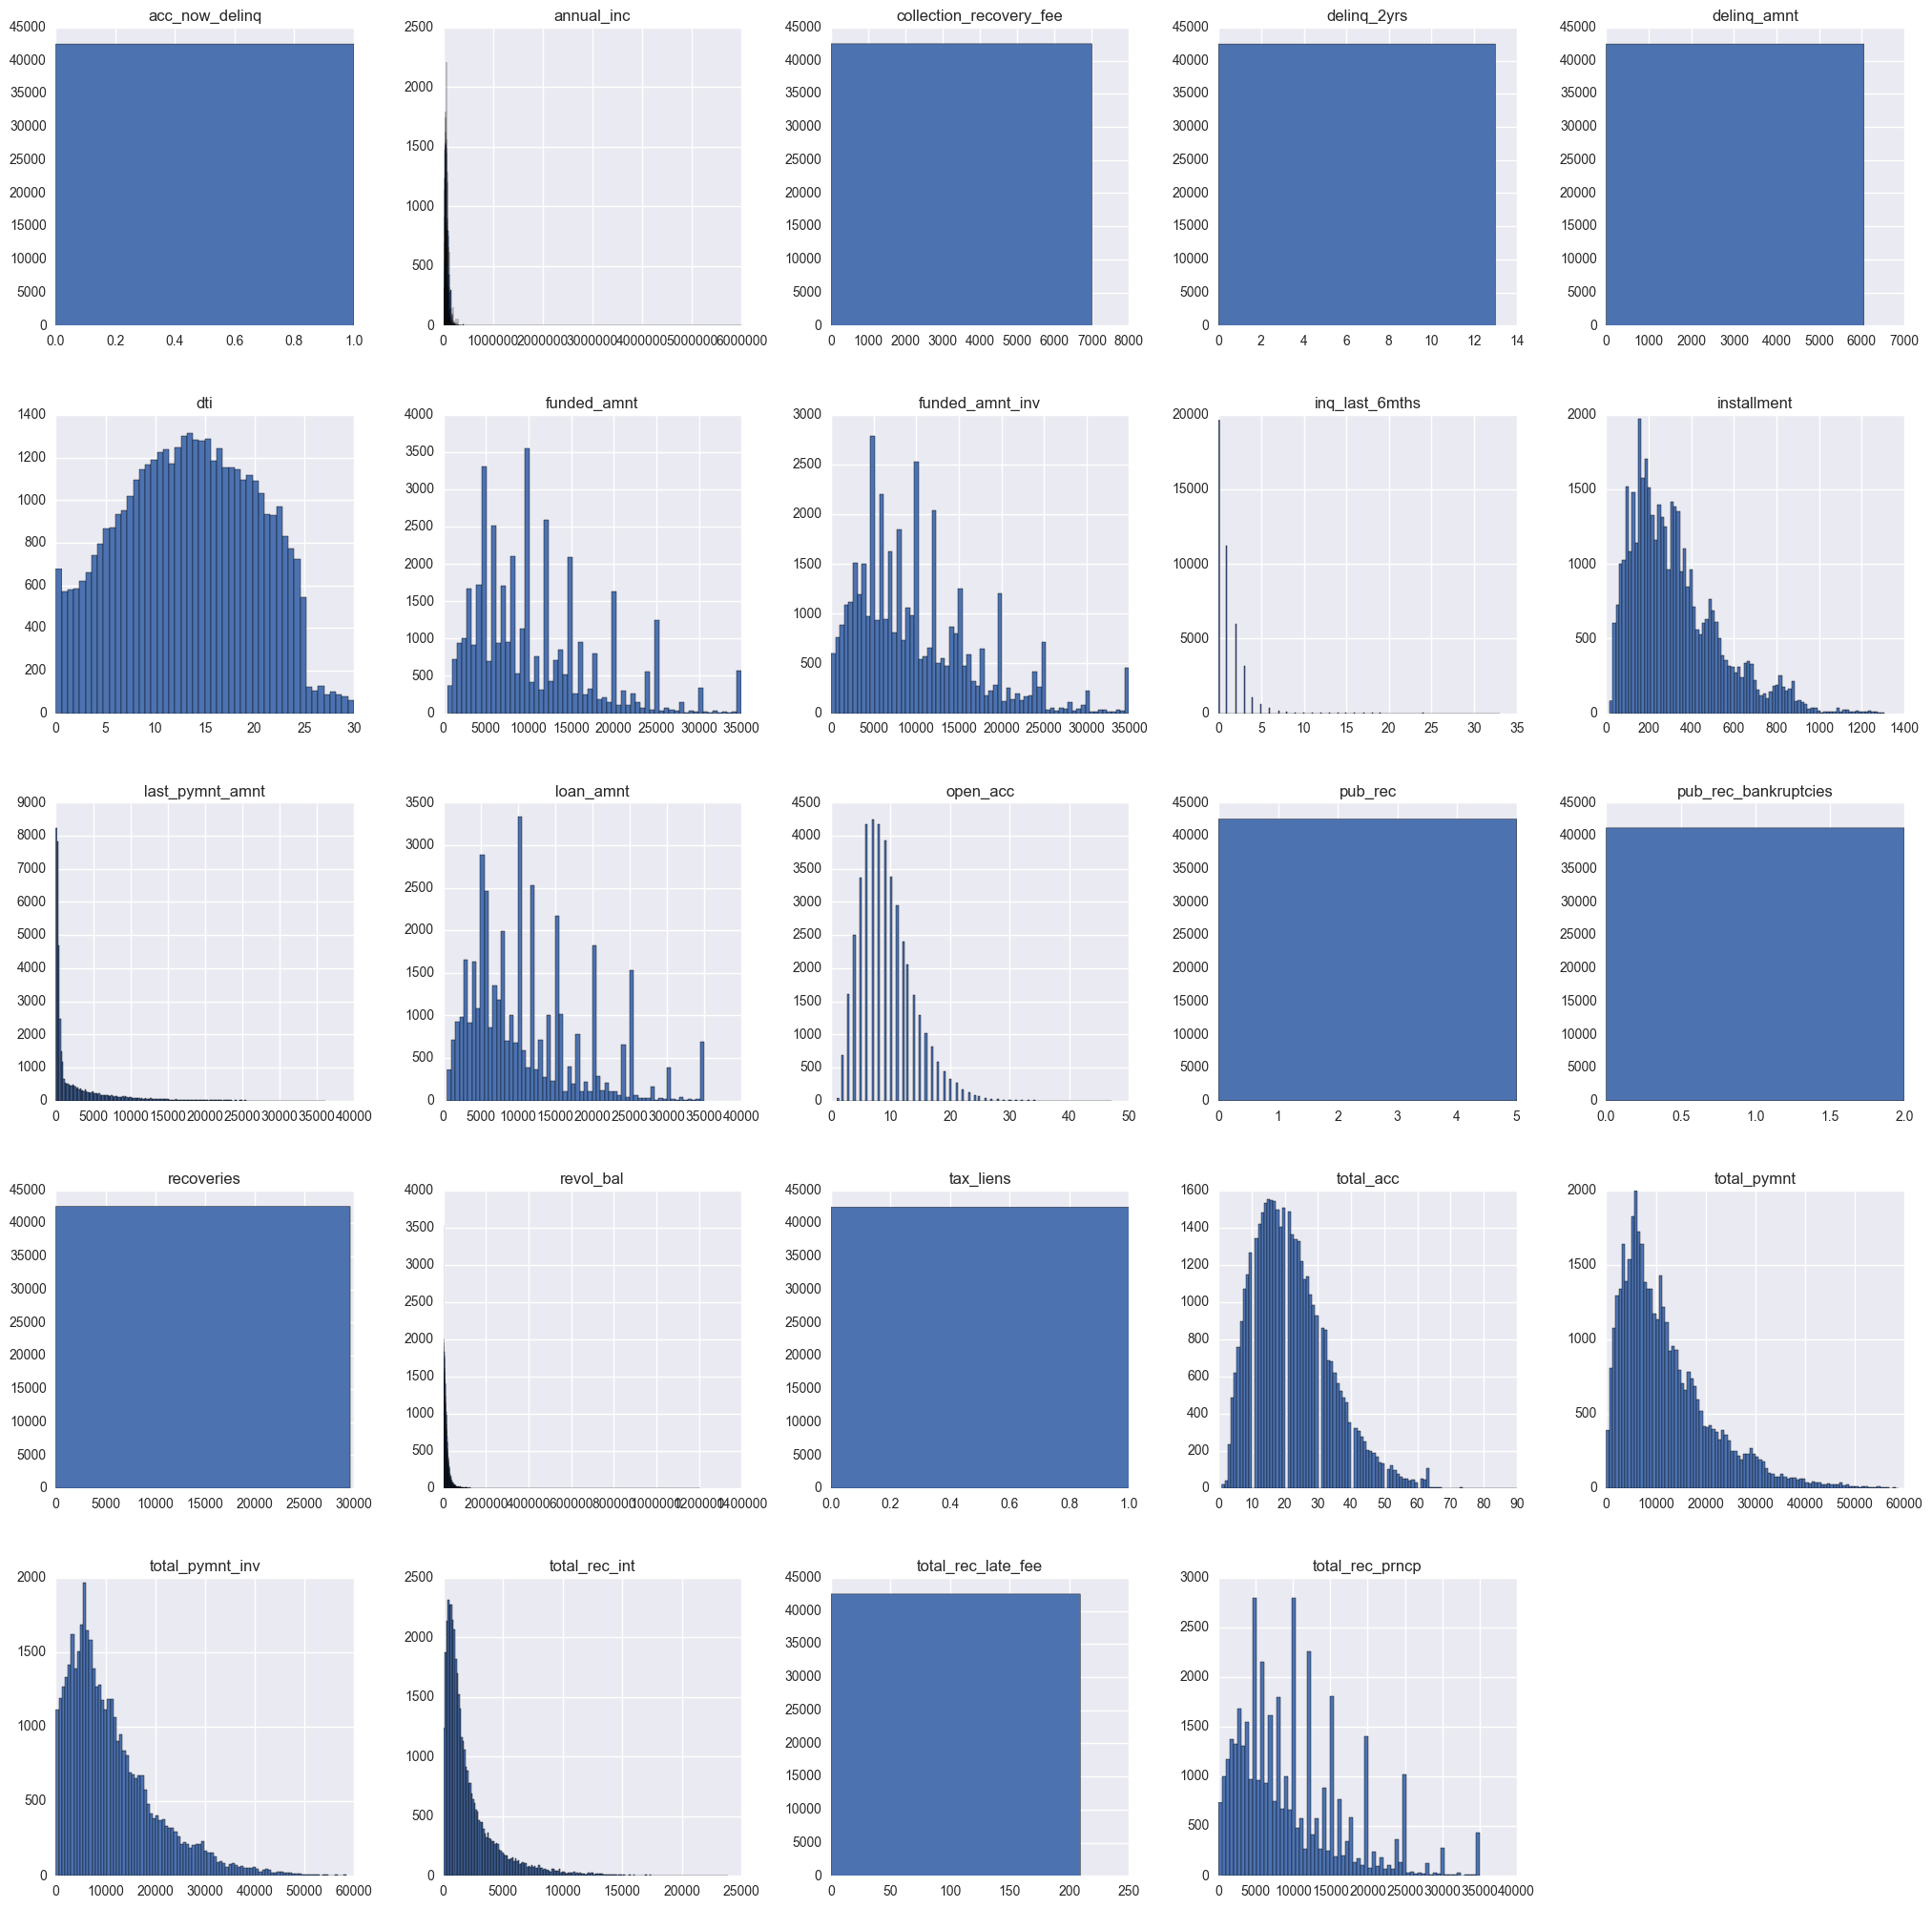

In [431]:
pd.DataFrame.hist(X[X.columns[X.dtypes != "object"]], figsize = [25,25], bins='auto')

Some variables have very skewed distribution and we can further lower down our feature size by looking at these skewed distribution and descriptions of variables.

In [432]:
X.drop('tax_liens' , axis=1, inplace=True) 
X.drop('delinq_amnt' , axis=1, inplace=True) 
X.drop('acc_now_delinq' , axis=1, inplace=True) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1bfe6fcf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1d1212e80>]], dtype=object)

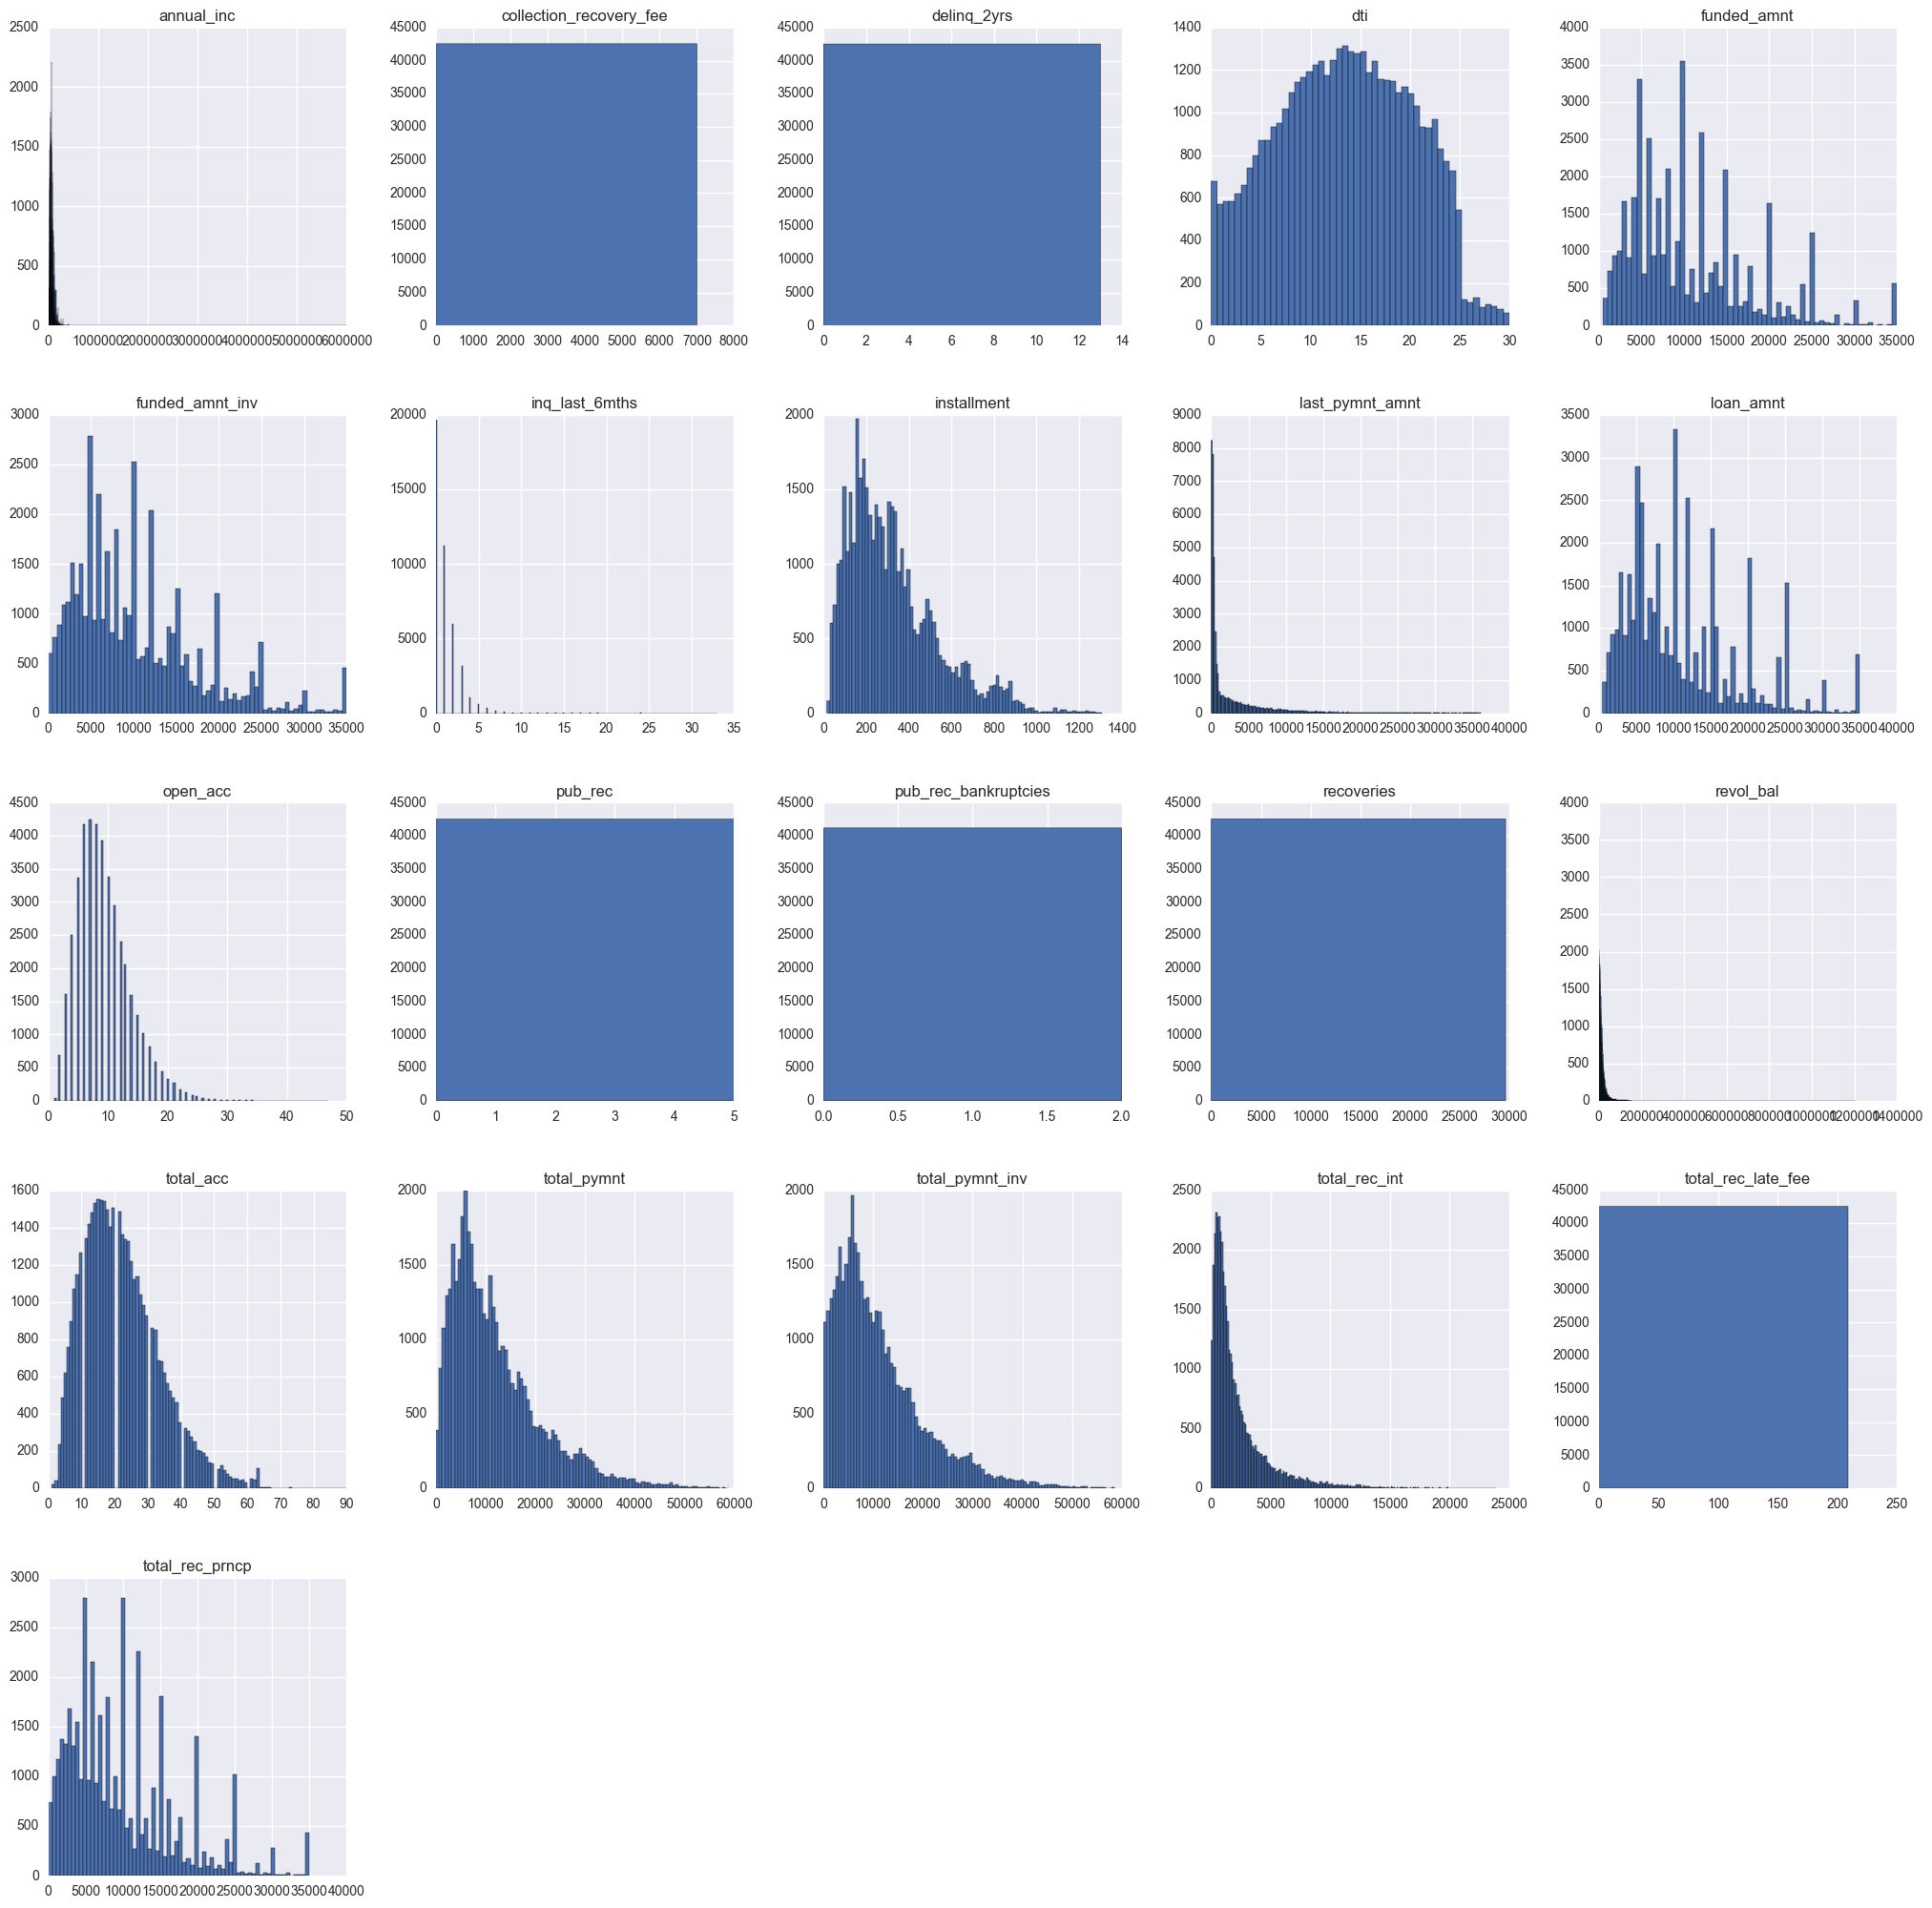

In [433]:
pd.DataFrame.hist(X[X.columns[X.dtypes != "object"]], figsize = [25,25], bins='auto')

### Feature Transformation

In [434]:
X['term'] = X['term'].str.split(' ').str[1].astype(float)

In [435]:
#interest rate is a string. Remove % and make it a float
X['int_rate'] = X['int_rate'].str.split('%').str[0]
X['int_rate'] = X.int_rate.astype(float)/100.

X['revol_util'] = X['revol_util'].str.split('%').str[0]
X['revol_util'] = X.revol_util.astype(float)/100.

In [436]:
# extract numbers from emp_length and fill missing values with the median
X['emp_length'] = X['emp_length'].str.extract('(\d+)').astype(float)
X['emp_length'] = X['emp_length'].fillna(X.emp_length.median())

/Users/chenchaozang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [437]:
# Start a simple model first, so drop sub_grade, emp_title, issue_d, desc variable first
X.drop('sub_grade' , axis=1, inplace=True) 

X.drop('emp_title' , axis=1, inplace=True) # If I have time, I may recategorize this column again.

X.drop('desc' , axis=1, inplace=True) # If I have time, I will do some NLP here.

X.drop('title' , axis=1, inplace=True)# If I have time, I will do some NLP here.

X.drop('zip_code' , axis=1, inplace=True)

X.drop('issue_d' , axis=1, inplace=True) # Create features based on date
X.drop('earliest_cr_line' , axis=1, inplace=True)
X.drop('last_pymnt_d' , axis=1, inplace=True)

X.drop('last_credit_pull_d' , axis=1, inplace=True)

#### Assumptions

* `debt_settlement_flag` may lead to the information leakage since it is flag charged off loan

* `recoveries`, `collection_recovery_fee` and `total_rec_late_fee` all could lead to information leakgae since they would be non zero only if the loan is will be a late payment.

#### Validation

* I will stratify split the data set into train and test and validate model on test data set

* I will validate my model by cross validation 

In [438]:
# Drop column could lead information leakage
X.drop('debt_settlement_flag' , axis=1, inplace=True)

X.drop('recoveries' , axis=1, inplace=True)

X.drop('collection_recovery_fee' , axis=1, inplace=True)

X.drop('total_rec_late_fee' , axis=1, inplace=True)

### Data Exploration

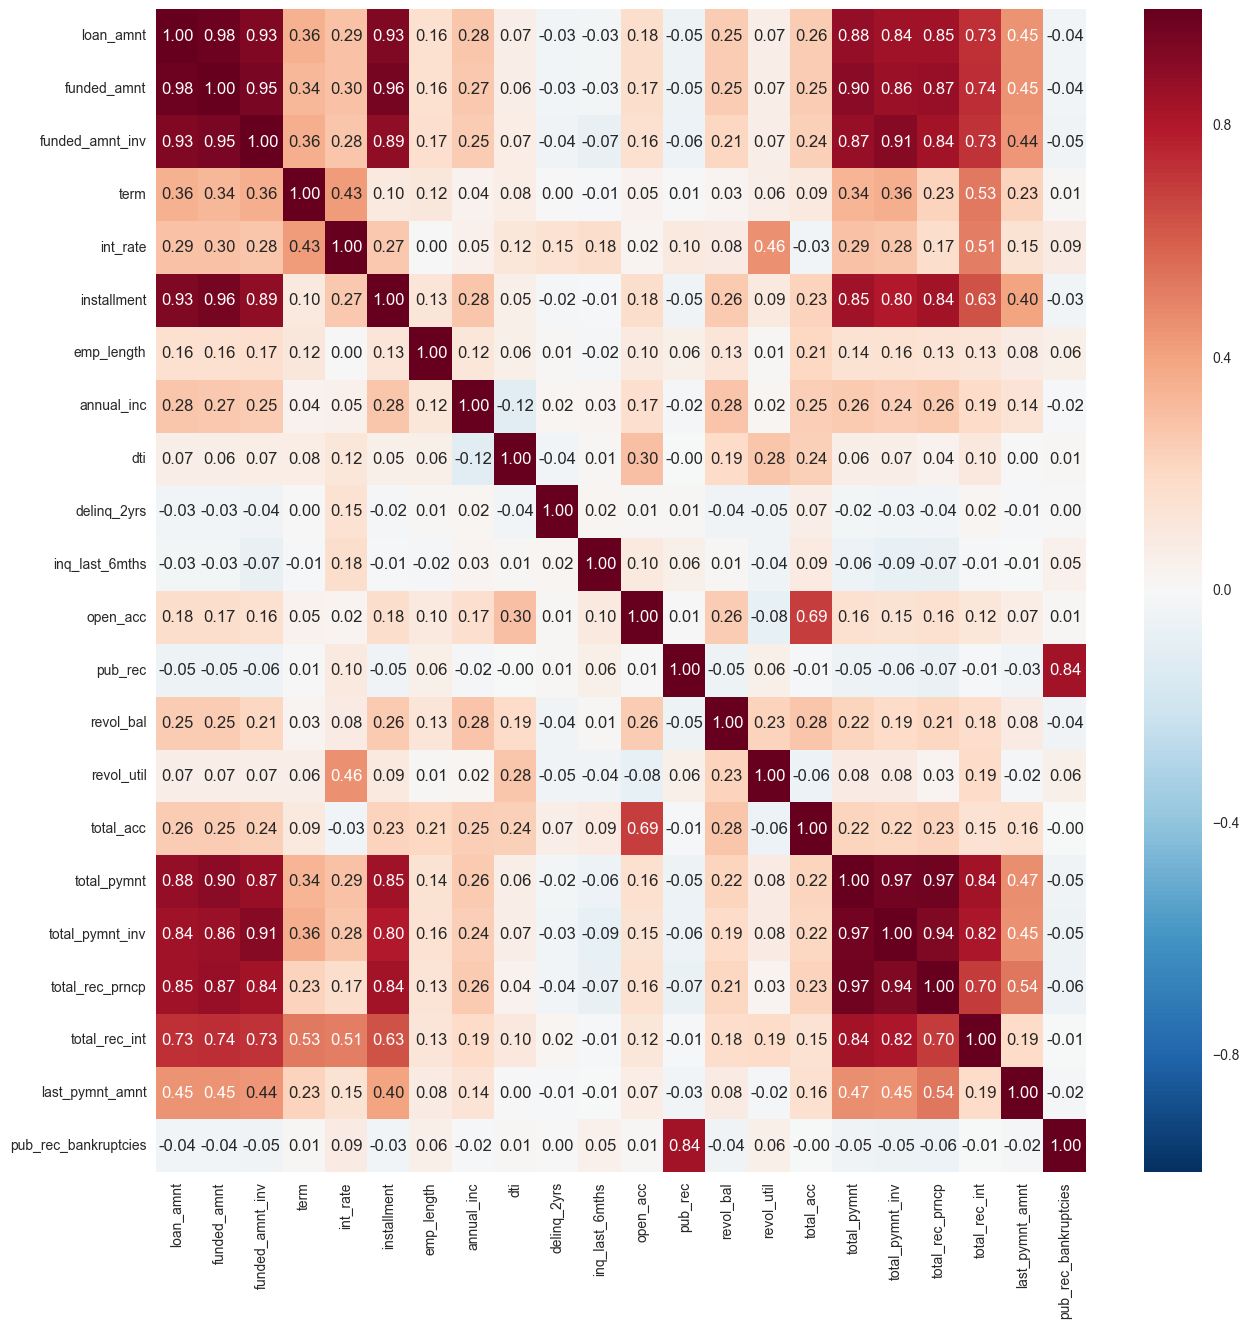

In [439]:
fig, ax = plt.subplots(figsize = (15,15))  
corr = X[X.columns[X.dtypes != "object"]].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True, fmt=".2f", ax = ax)


The correlation is calculated by Pearson Correlation, so here I can naively look at the association between two variables and the graph may give me further information between variables rather than just a single variable itself. Obviously, there are several heavily colored clusters in this heatmap and if we take a look at them, the relationships between variables make sense.

In [440]:
X_for_plt = X.copy()
X = X.drop('loan_status',axis=1)

In [441]:
from sklearn.model_selection import train_test_split
data_train, data_test, default_train, default_test = train_test_split(X, y == "defaulted", random_state=0, stratify=y)

In [444]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

In [445]:
data_train.isnull().any()

loan_amnt               False
funded_amnt             False
funded_amnt_inv         False
term                    False
int_rate                False
installment             False
grade                   False
emp_length              False
home_ownership          False
annual_inc               True
verification_status     False
purpose                 False
addr_state              False
dti                     False
delinq_2yrs              True
inq_last_6mths           True
open_acc                 True
pub_rec                  True
revol_bal               False
revol_util               True
total_acc                True
total_pymnt             False
total_pymnt_inv         False
total_rec_prncp         False
total_rec_int           False
last_pymnt_amnt         False
pub_rec_bankruptcies     True
dtype: bool

In [446]:
def imputation(data_train):
    categorical = data_train.columns[data_train.dtypes == "object"]
    from sklearn.base import TransformerMixin
    class DataFrameImputer(TransformerMixin):
        def __init__(self):
            """Impute missing categorical values.
            Columns of dtype object are imputed with the most frequent value 
            in column.
            """
        def fit(self, X, y=None):

            self.fill = pd.Series([X[c].value_counts().index[0]
                if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
                index=X.columns)
            return self
        def transform(self, X, y=None):
            return X.fillna(self.fill)
    data_train_categorical = DataFrameImputer().fit_transform(data_train[categorical])
    def imputate_continuous(data_train):
        '''  Imputation Continuous Variable 
        '''
        continuous = data_train.columns[data_train.dtypes != "object"]
        index_train = data_train.index
        X_train = data_train[continuous].as_matrix()
        X_train_fancy_mice = fancyimpute.MICE(verbose=0).complete(X_train)
        data_train_continuous = pd.DataFrame(X_train_fancy_mice,columns=continuous,index = index_train)
        return data_train_continuous
    data_train_continuous = imputate_continuous(data_train)
    data_train_imputation = pd.merge(data_train_categorical, data_train_continuous, left_index=True, right_index=True)
    return data_train_imputation

In [447]:
data_train_imputation = imputation(data_train)
data_train_imputation.shape

(31901, 27)

In [448]:
data_test_imputation = imputation(data_test)
data_test_imputation.shape

(10634, 27)

In [449]:
data_train_dummies = pd.get_dummies(data_train_imputation)
data_train_dummies.shape

(31901, 101)

In [450]:
data_test_dummies = pd.get_dummies(data_test_imputation)
for column in data_train_dummies.columns:
    if (column not in data_test_dummies.columns):
        data_test_dummies[column] = pd.Series(0, index=data_test_dummies.index)
data_test_dummies.shape

(10634, 101)

#### Model with Imbalanced Weights

In [451]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
log_pipe_im_weight = make_pipeline(StandardScaler(), LogisticRegressionCV(class_weight='balanced'))

In [452]:
log_pipe_im_weight.fit(data_train_dummies, default_train)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregressioncv', LogisticRegressionCV(Cs=10, class_weight='balanced', cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

In [453]:
cross_val_score(log_pipe_im_weight, data_train_dummies, default_train, cv=5, scoring="roc_auc")

array([ 0.991,  0.994,  0.993,  0.993,  0.99 ])

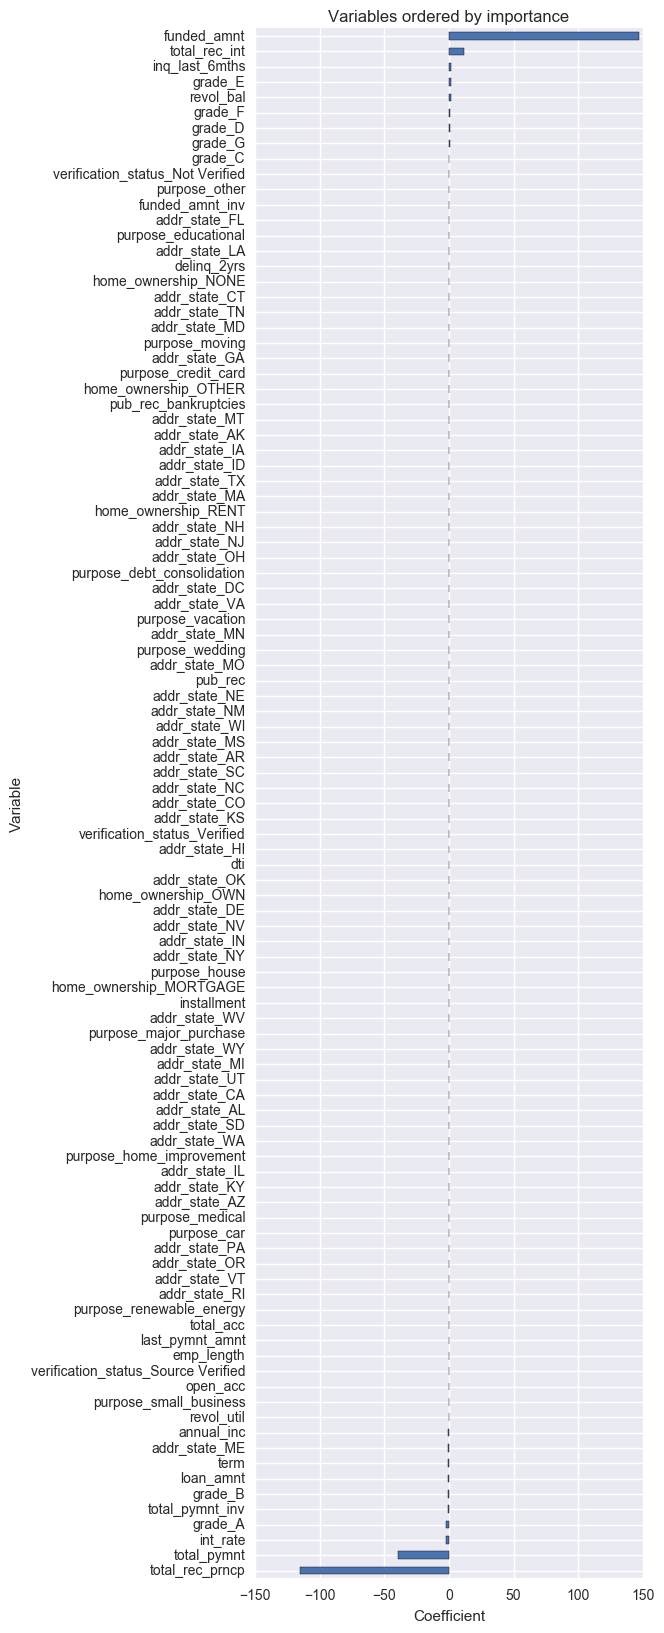

In [454]:
plt.figure(figsize=(5, 20))
coef = pd.Series(log_pipe_im_weight.named_steps['logisticregressioncv'].coef_.ravel(), index=data_train_dummies.columns)
coef.sort_values().plot(kind="barh")
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Variables ordered by importance")

#### Model with SMOTE sampling

In [400]:
from imblearn.over_sampling import SMOTE
from sklearn.base import clone
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.ensemble import VotingClassifier
log_pipe_smote = make_imb_pipeline(StandardScaler(),SMOTE(), LogisticRegressionCV())

In [401]:
cross_val_score(log_pipe_smote, data_train_dummies, default_train, cv=5, scoring="roc_auc")

array([ 0.99071431,  0.99407228,  0.99172924,  0.99267064,  0.98962673])

#### Model with Undersampling

In [402]:
from imblearn.under_sampling import RandomUnderSampler
log_pipe_undersample = make_imb_pipeline(StandardScaler(),RandomUnderSampler(), LogisticRegressionCV())

In [403]:
cross_val_score(log_pipe_undersample, data_train_dummies, default_train, cv=5, scoring="roc_auc")

array([ 0.99047592,  0.99406686,  0.9917229 ,  0.99189806,  0.98852726])

#### Ensemble Method

In [404]:
from sklearn.base import clone
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.ensemble import VotingClassifier
def make_resampled_ensemble(estimator, n_estimators=100):
    estimators = []
    for i in range(n_estimators):
        est = clone(estimator)
        if hasattr(est, "random_state"):
            est.random_state = i
        pipe = make_imb_pipeline(RandomUnderSampler(random_state=i, replacement=True),
                                 est)
        estimators.append(("est_i".format(i), pipe))
    return VotingClassifier(estimators, voting="soft")
resampled_lr = make_resampled_ensemble(LogisticRegressionCV())

#### Evaluation of sampling method

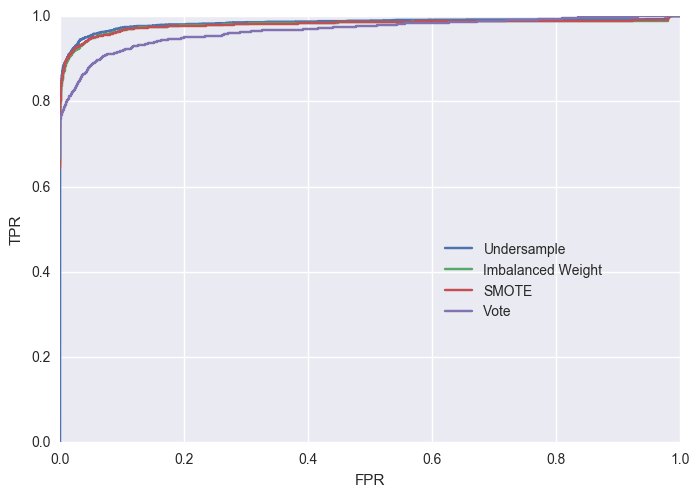

In [405]:
from sklearn.metrics import roc_curve
log_pipe_im_weight.fit(data_train_dummies, default_train)
props_oversample = log_pipe_im_weight.predict_proba(data_test_dummies)[:, 1]
fpr_over, tpr_over, _ = roc_curve(default_test, props_oversample)

log_pipe_smote.fit(data_train_dummies, default_train)
props_undersample = log_pipe_smote.predict_proba(data_test_dummies)[:, 1]
fpr_under, tpr_under, _ = roc_curve(default_test, props_undersample)

log_pipe_undersample.fit(data_train_dummies, default_train)
props_original = log_pipe_undersample.predict_proba(data_test_dummies)[:, 1]
fpr_org, tpr_org, _ = roc_curve(default_test, props_original)

resampled_lr.fit(data_train_dummies, default_train)
props_vote = resampled_lr.predict_proba(data_test_dummies)[:, 1]
fpr_vote, tpr_vote, _ = roc_curve(default_test, props_vote)

plt.plot(fpr_org, tpr_org, label="Undersample")
plt.plot(fpr_over, tpr_over, label="Imbalanced Weight")
plt.plot(fpr_under, tpr_under, label="SMOTE")
plt.plot(fpr_vote, tpr_vote, label="Vote")
plt.legend(loc = "upper left",bbox_to_anchor=(0.6,0.5))
plt.xlabel("FPR")
plt.ylabel("TPR")

#### Tree Model

In [595]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(n_estimators=500), data_train_dummies, default_train, cv=3, scoring="roc_auc")

array([ 0.993,  0.992,  0.992])

In [596]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0)
cross_val_score(clf, data_train_dummies, default_train, cv=5, scoring="roc_auc")

array([ 0.989,  0.985,  0.952,  0.986,  0.985])

In [602]:
resampled_tree = make_resampled_ensemble(RandomForestClassifier(n_estimators=500))

#### Decision Tree Visualization

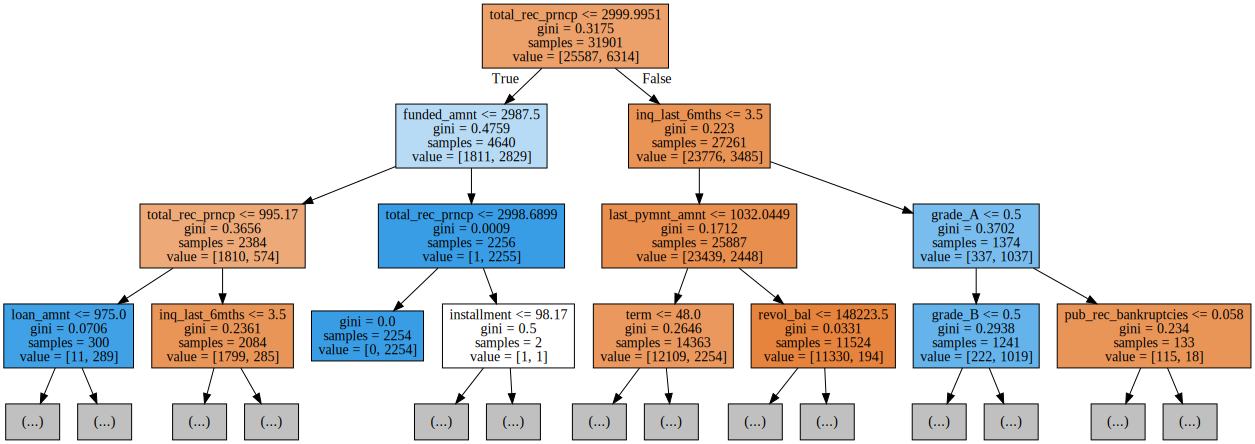

In [597]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
tree = DecisionTreeClassifier().fit(data_train_dummies, default_train)
graphviz.Source(export_graphviz(tree, out_file=None, max_depth=3,
                                filled=True,
                                feature_names=data_train_dummies.columns))

#### Neural Network

In [598]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier()
mlp_pipe =  make_pipeline(StandardScaler(), mlp)
# cross_val_score(pipe_kernel, data_train_dummies, churn_train, cv=5, scoring="roc_auc")
param_grid = {'mlpclassifier__hidden_layer_sizes': [5, 10, 50, 100, 200]}
grid = GridSearchCV(mlp_pipe, param_grid, cv=5)

In [599]:
resampled_nn = make_resampled_ensemble(grid)
grid.fit(data_train_dummies, default_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlpclassifier', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
 ...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'mlpclassifier__hidden_layer_sizes': [5, 10, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [600]:
grid.best_score_

0.96975016457164354

#### Model Evaluation

In [ ]:
from sklearn.metrics import roc_curve
resampled_tree.fit(data_train_dummies, default_train)
props_oversample = resampled_tree.predict_proba(data_test_dummies)[:, 1]
fpr_over, tpr_over, _ = roc_curve(default_test, props_oversample)

resampled_nn.fit(data_train_dummies, default_train)
props_original = resampled_nn.predict_proba(data_test_dummies)[:, 1]
fpr_org, tpr_org, _ = roc_curve(default_test, props_original)

resampled_lr.fit(data_train_dummies, default_train)
props_vote = resampled_lr.predict_proba(data_test_dummies)[:, 1]
fpr_vote, tpr_vote, _ = roc_curve(default_test, props_vote)

plt.plot(fpr_org, tpr_org, label="NN")
plt.plot(fpr_over, tpr_over, label="Tree")
plt.plot(fpr_vote, tpr_vote, label="LogisticRegression")
plt.legend(loc = "upper left",bbox_to_anchor=(0.6,0.5))
plt.xlabel("FPR")
plt.ylabel("TPR")
savefig('model_evaluation.png')

#### Train Final Model Using all the data

In [ ]:
all_data_imputation = imputation(X)
all_data_dummies = pd.get_dummies(all_data_imputation)
log_pipe_im_weight = make_pipeline(StandardScaler(), LogisticRegressionCV(class_weight='balanced')).fit(all_data_dummies,churn)

####  Business Strategy

In [407]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# matplotlib.style.use('ggplot')
plt.rcParams["figure.dpi"] = 100
import plotly
from plotly.graph_objs import Scatter, Layout
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
np.set_printoptions(precision=3, suppress=True)
from sklearn.model_selection import train_test_split
import fancyimpute

In [492]:
def draw_pie(variable):
    fig = {
    'data': [{'labels': [str(item) for item in X[variable].value_counts().index.tolist()],
              'values': X[variable].value_counts().tolist(),
              'type': 'pie'}],
    'layout': {'title': 'Consumer Distribution on ' + str(variable)}
     }
    return fig

In [496]:
def draw_stacked_bar(variable):
    data = X_for_plt.copy()
    group_by_antig_year = data.groupby(['loan_status', variable]).size().unstack()

    import plotly.plotly as py
    import plotly.graph_objs as go

    list1 = [group_by_antig_year.ix[1,column] for column in data[variable].value_counts().index]
    list2 = [group_by_antig_year.ix[0,column] for column in data[variable].value_counts().index]
    sum_list = [sum(x) for x in zip(list1, list2)]
    percentage = [i/j*100 for i,j in zip(list2, sum_list)]
    percentage = [ '%.4f' % elem for elem in percentage ]

    trace1 = go.Bar(
        x=[str(item) for item in data[variable].value_counts().index.tolist()],
        y=[group_by_antig_year.ix[1,column] for column in data[variable].value_counts().index],
        name='Not Defaulted'
    )
    trace2 = go.Bar(
        x=[str(item) for item in data[variable].value_counts().index.tolist()],
        y=[group_by_antig_year.ix[0,column] for column in data[variable].value_counts().index],
        text = [str(item)+"%" for item in percentage],
        name='Defaulted'

    )

    data_draw = [trace1, trace2]
    layout = go.Layout(
        barmode='stack',
        title = 'Defaulted or Not Defaulted Consumers Distribution Group By ' + str(variable)
    )

    fig = go.Figure(data=data_draw, layout=layout)
    return fig

In [497]:
X.dtypes[X.dtypes == 'object']

grade                  object
home_ownership         object
verification_status    object
purpose                object
addr_state             object
dtype: object

#### Consumer Distribution on State (Which locations should we target)

In [507]:
py.iplot(draw_pie('addr_state'))

In [508]:
py.iplot(draw_stacked_bar('addr_state'), filename='stacked-bar')

In [513]:
group_by_antig_year = X_for_plt.groupby(['loan_status', 'addr_state']).size().unstack()
list1 = [group_by_antig_year.ix[1,column] for column in X_for_plt['addr_state'].value_counts().index]
list2 = [group_by_antig_year.ix[0,column] for column in X_for_plt['addr_state'].value_counts().index]
sum_list = [sum(x) for x in zip(list1, list2)]
percentage = [i/j*100 for i,j in zip(list2, sum_list)]

In [520]:
np.nanmean(np.array(percentage))

23.781651172216769

In [563]:
count_state = X_for_plt.groupby(['loan_status', 'addr_state']).size().reset_index()
count_state.head()

,loan_status,addr_state,0
0,defaulted,AK,21
1,defaulted,AL,86
2,defaulted,AR,43
3,defaulted,AZ,176
4,defaulted,CA,1455


In [566]:
interest_rate = X_for_plt.groupby(['addr_state']).int_rate.mean().reset_index().sort_values('int_rate',ascending = False)
interest_rate.head()

,addr_state,int_rate
0,AK,0.128609
28,NE,0.128418
11,HI,0.126377
32,NV,0.126214
49,WY,0.126190


In [567]:
total_payment = X_for_plt.groupby(['addr_state']).total_pymnt.mean().reset_index().sort_values('total_pymnt',ascending = False)
total_payment.head()

,addr_state,total_pymnt
0,AK,14127.240000
7,DC,13628.711546
49,WY,13160.502562
44,VA,12730.253848
42,TX,12724.535193


In [568]:
data = pd.merge(count_state,interest_rate,on='addr_state',how = 'outer')
data = pd.merge(data,total_payment,on='addr_state',how = 'outer')
data.head()

,loan_status,addr_state,0,int_rate,total_pymnt
0,defaulted,AK,21,0.128609,14127.240000
1,non_defaulted,AK,65,0.128609,14127.240000
2,defaulted,AL,86,0.119634,12387.165008
3,non_defaulted,AL,398,0.119634,12387.165008
4,defaulted,AR,43,0.117544,11442.722621


In terms of the business strategy for our client, we can consider the `revenue` = `sale` - `cost`.
 
 * Here we mainly consider cost as the risk from defaulted loan. 
 
 * Sale is related to the number of loans or number of customer, amount of each loan and interest rate of each customer.
 
Therefore,I plot the customer distribution on each state and we can get that `CA` and `NY` are the major markets. At the same time, I also plot the number of customer in defaulted and non-defaulted group and labeled the default rate.
As we can observe, both `CA` and `NY` have lower default rate than the country side average 23.78%. Therefore, I would suggest our client to start the market from `CA` and `NY` first.

Obviously, this is a good question which worth us to explore more. Take a step back to the formula for the `revenue`, the `sale` consists of number of `non_defaulted` loan, amount of each `non_defaulted` loan and `interest rate`. The cost are from number of `defaulted` loan and amount of each `defaulted` loan.

#### Consumer Distribution on Each Grade

In [495]:
py.iplot(draw_pie('grade'))

In [498]:
py.iplot(draw_stacked_bar('grade'), filename='stacked-bar')

#### Consumer Distribution on Home Ownership

In [499]:
py.iplot(draw_pie('home_ownership'))

In [500]:
py.iplot(draw_stacked_bar('home_ownership'), filename='stacked-bar')

#### Consumer Distribution on Verification Status

In [501]:
py.iplot(draw_pie('verification_status'))

In [502]:
py.iplot(draw_stacked_bar('verification_status'), filename='stacked-bar')

#### Consumer Distribution on Purpose

In [503]:
py.iplot(draw_pie('purpose'))

In [504]:
py.iplot(draw_stacked_bar('purpose'), filename='stacked-bar')

####  Which segments of the population should we advertise?

In terms of segments, I tried to divide customers based on categorical variables such as grade, home_ownership, verification_status, purpose and addr_state.

In a simple case, in order to advertise customer, we want to target the groups of people with low defaulted loan rate. However, this questions should be further explored from other perspectives, such as following:

* I do remember there is a variable about employment tile which was dropped. I think I will be able to further taget the customer based on analyzing that variable

* There is another variale about description of loan, which was also dropped. Through NLP techniques, I will be able to get more information about the loan and customers as well.

* If I would be able to get the historical dataset and look at the increase of number of customers of each group, this result may futher help me decide which group of customer I should target.

#### Any other helpful strategy you can provide to make sure we keep default rates low

In order to keep low default rate, there are a couple things that our customer can do:

* Grade the loan more accurately. There is a clealy difference of default on various grade groups

* Verification could be another part that our customer should focus more on

* If we look back to the contribution of variables to predict the defaulted loan, `funded_amnt` and `total_rec_int` pop out, so it is reasonable to suggest our client to have a limitation on the amount of each loan and keep the interest rate on a reasonable range.

In [ ]:
def data_processing(train_data,path):
    test_data = pd.read_csv(path,skiprows = 1,low_memory=False)
    # Drop rows without loan status column value
    test_data = test_data.drop(test_data[test_data.loan_status.isnull()].index)
    
    # Drop column with 50% of missing value
    check_null = train_data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(train_data))
    check_null_col = list(check_null.index)
    
    for col in test_data.columns:
        if(col in check_null_col):
            test_data.drop(col, axis=1, inplace=True) 
            
    counts = np.array([len(train_data[col].value_counts()) for col in train_data.columns])
    counts_1_col = X.columns[counts == 1]
    try:
        for col in test_data.columns:
            if(col in counts_1_col):
                test_data.drop(col, axis=1, inplace=True) 
    except:
        continue
    
    try:
        test_data.drop('tax_liens' , axis=1, inplace=True) 
        test_data.drop('delinq_amnt' , axis=1, inplace=True) 
        test_data.drop('acc_now_delinq' , axis=1, inplace=True) 
    
    try:
        test_data['term'] = test_data['term'].str.split(' ').str[1].astype(float)
        #interest rate is a string. Remove % and make it a float
        test_data['int_rate'] = test_data['int_rate'].str.split('%').str[0]
        test_data['int_rate'] = test_data.int_rate.astype(float)/100.

        test_data['revol_util'] = test_data['revol_util'].str.split('%').str[0]
        test_data['revol_util'] = test_data.revol_util.astype(float)/100.

        # extract numbers from emp_length and fill missing values with the median
        test_data['emp_length'] = test_data['emp_length'].str.extract('(\d+)').astype(float)
        test_data['emp_length'] = test_data['emp_length'].fillna(test_data.emp_length.median())
        
        # Start a simple model first, so drop sub_grade, emp_title, issue_d, desc variable first
        test_data.drop('sub_grade' , axis=1, inplace=True) 

        test_data.drop('emp_title' , axis=1, inplace=True) # If I have time, I may recategorize this column again.

        test_data.drop('desc' , axis=1, inplace=True) # If I have time, I will do some NLP here.

        test_data.drop('title' , axis=1, inplace=True)# If I have time, I will do some NLP here.

        test_data.drop('zip_code' , axis=1, inplace=True)

        test_data.drop('issue_d' , axis=1, inplace=True) # Create features based on date
        test_data.drop('earliest_cr_line' , axis=1, inplace=True)
        test_data.drop('last_pymnt_d' , axis=1, inplace=True)

        test_data.drop('last_credit_pull_d' , axis=1, inplace=True)

        # Drop column could lead information leakage
        test_data.drop('debt_settlement_flag' , axis=1, inplace=True)

        test_data.drop('recoveries' , axis=1, inplace=True)

        test_data.drop('collection_recovery_fee' , axis=1, inplace=True)

        test_data.drop('total_rec_late_fee' , axis=1, inplace=True)
        
        test_data.drop('loan_status' , axis=1, inplace=True)
        
    except:
        continue
    
    data_train_imputation = imputation(train_data)
    data_train_dummies = pd.get_dummies(data_train_imputation)
    
    data_test_imputation = imputation(test_data)
    data_test_imputation.shape

    data_test_dummies = pd.get_dummies(data_test_imputation)
    for column in data_train_dummies.columns:
        if (column not in data_test_dummies.columns):
            data_test_dummies[column] = pd.Series(0, index=data_test_dummies.index)
    
    return data_test_dummies

In [ ]:
test_data_dummies = data_processing(train_data,path)

In [ ]:
temp_test['Churn_probability'] = log_pipe_im_weight.predict_proba(test_data_dummies)[:, 1]